In [11]:
# Instalacion de dependencias
IMG_URL = "https://github.com/JuanCruzMonteros/Vision-Computacional/blob/main/Tp1-segmentacion/Luna.jpg?raw=true"

# 2) Dependencias (OpenCV ya suele venir en Colab, pero por las dudas):
!pip -q install opencv-python

In [12]:
# importacion de librerías
import cv2
import numpy as np
import urllib.request
import matplotlib.pyplot as plt

In [13]:
# carga de imagen

def load_image_from_url(url: str):
    try:
        with urllib.request.urlopen(url) as resp:
            data = np.asarray(bytearray(resp.read()), dtype=np.uint8)
        img_bgr = cv2.imdecode(data, cv2.IMREAD_COLOR)
        if img_bgr is None:
            raise ValueError("No se pudo decodificar la imagen. Verificá la URL o el formato.")
        img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
        return img_rgb
    except Exception as e:
        raise RuntimeError(f"Error al descargar/leer la imagen: {e}")

img_rgb = load_image_from_url(IMG_URL)

In [14]:
# Separacion en canales RGB
R = img_rgb[:, :, 0]
G = img_rgb[:, :, 1]
B = img_rgb[:, :, 2]

In [15]:
# Creo versiones de la imagen dejando activo solo un canal (R, G o B) y poniendo los otros dos a cero.
zeros = np.zeros_like(R)
img_R_only = np.dstack([R, zeros, zeros])
img_G_only = np.dstack([zeros, G, zeros])
img_B_only = np.dstack([zeros, zeros, B])

In [16]:
# Convierto a gris y B/N mediante el metodo Otsu
gray = cv2.cvtColor(img_rgb, cv2.COLOR_RGB2GRAY)
_, bw = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

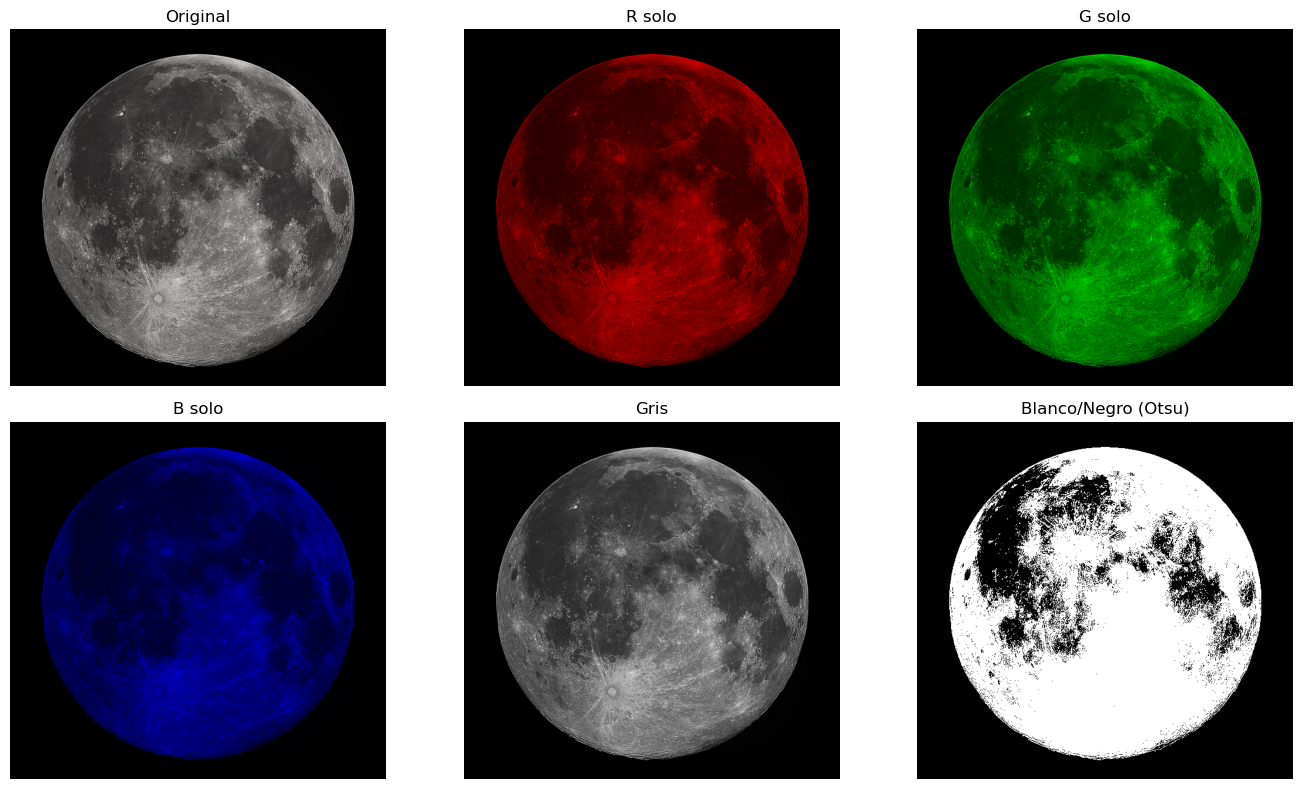

In [18]:
# Resultados
titles = ["Original", "R solo", "G solo", "B solo", "Gris", "Blanco/Negro (Otsu)"]
images = [img_rgb, img_R_only, img_G_only, img_B_only, gray, bw]

plt.figure(figsize=(14, 8))
for i, (t, im) in enumerate(zip(titles, images), 1):
    plt.subplot(2, 3, i)
    if im.ndim == 2:
        plt.imshow(im, cmap='gray')
    else:
        plt.imshow(im)
    plt.title(t)
    plt.axis('off')
plt.tight_layout()
plt.show()


In [19]:
# Descargar imagenes
cv2.imwrite('R_solo.png', cv2.cvtColor(img_R_only, cv2.COLOR_RGB2BGR))
cv2.imwrite('G_solo.png', cv2.cvtColor(img_G_only, cv2.COLOR_RGB2BGR))
cv2.imwrite('B_solo.png', cv2.cvtColor(img_B_only, cv2.COLOR_RGB2BGR))
cv2.imwrite('gris.png', gray)
cv2.imwrite('blanco_negro.png', bw)
print("Se han guardado las diferentes versiones de la imagen en su entorno local")

Se han guardado las diferentes versiones de la imagen en su entorno local
